In [1]:
import pickle
import pandas as pd

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
featData = pickle.load(open('sandersFeatures.pkl', 'r'))
featArray = featData['features']
bookNames = featData['titles']
allCatNames = featData['catNames']

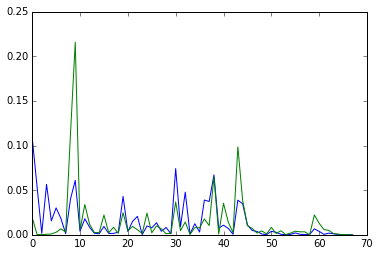

In [5]:
useFeatures = range(len(allCatNames))

featArray = featArray[:,useFeatures]

#d = np.zeros((featArray.shape[0],featArray.shape[0]))
#for i in range(featArray.shape[0]):
#    for j in range(featArray.shape[0]):
#        d[i,j] = np.linalg.norm(featArray[i,:]-featArray[j,:])

book1 = featArray[405]
book2 = featArray[551]

plot(book1)
plot(book2)

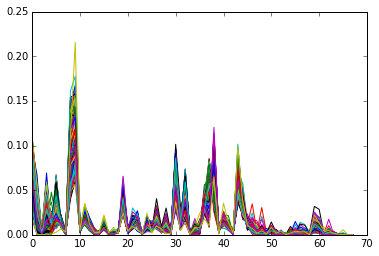

In [7]:
for i in range(552):
    plot(featArray[i])


In [8]:
d = pickle.load(open('sandersDistance.pkl', 'r'))

In [9]:
np.unravel_index(d.argmax(), d.shape)


(405, 551)

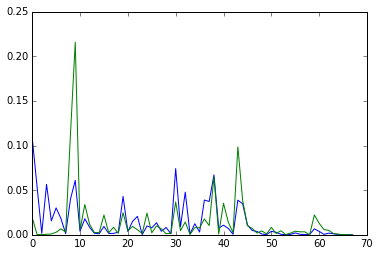

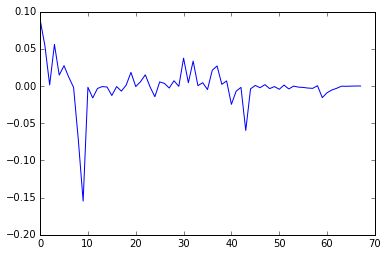

In [11]:
book1 = featArray[405]
book2 = featArray[551]

plot(book1)
plot(book2)
figure()
plot(book1-book2)


In [12]:
import scipy.cluster.hierarchy

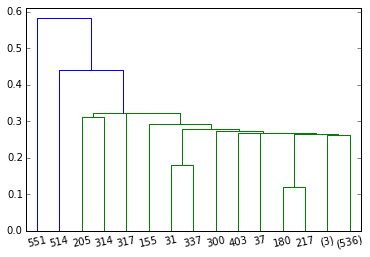

In [14]:
x = scipy.cluster.hierarchy.linkage(d)
scipy.cluster.hierarchy.dendrogram(x,truncate_mode='level', p=10);


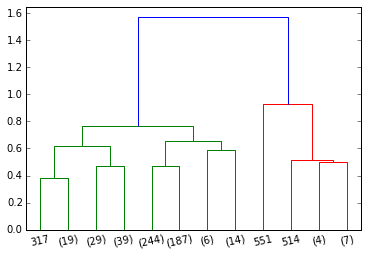

In [15]:
x = scipy.cluster.hierarchy.centroid(d)
scipy.cluster.hierarchy.dendrogram(x,truncate_mode='level', p=3);

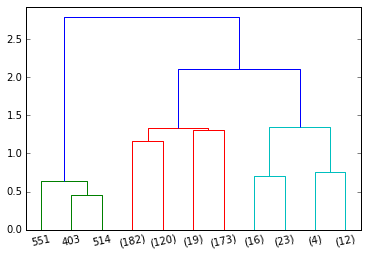

In [18]:
x = scipy.cluster.hierarchy.complete(d)
scipy.cluster.hierarchy.dendrogram(x,truncate_mode='level', p=3);

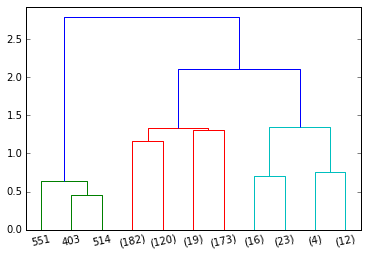

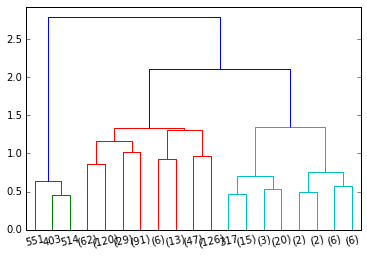

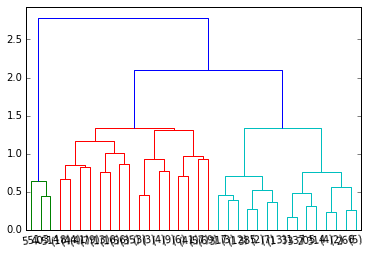

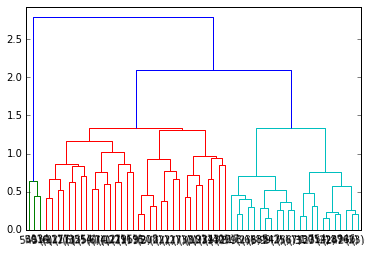

In [20]:
for p in range(3,7):
    figure()
    x = scipy.cluster.hierarchy.complete(d)
    scipy.cluster.hierarchy.dendrogram(x,truncate_mode='level', p=p);

In [78]:
tree = scipy.cluster.hierarchy.to_tree(x)

def getName(n):
    return '%d'%n

def newNode(node, maxDepth=4):
    treeNode = {}

    if (node.left or node.right) and maxDepth > 0:
        treeNode['children'] = []
        if node.left:
            kid = newNode(node.left, maxDepth=maxDepth-1)
            treeNode['children'].append(kid)
        if node.right:
            kid = newNode(node.right, maxDepth=maxDepth-1)
            treeNode['children'].append(kid)

    if node.is_leaf():
        treeNode['name'] = getName(node.id)
    elif maxDepth == 0:
        treeNode['name'] = 'Cluster containing %d books' % node.get_count()
    else:
        treeNode['name'] = ''
    return treeNode

d3Dendro = newNode(tree, maxDepth=5)

print json.dumps(d3Dendro,indent=2,sort_keys=True)

{
  "children": [
    {
      "children": [
        {
          "name": "551"
        }, 
        {
          "children": [
            {
              "name": "403"
            }, 
            {
              "name": "514"
            }
          ], 
          "name": ""
        }
      ], 
      "name": ""
    }, 
    {
      "children": [
        {
          "children": [
            {
              "children": [
                {
                  "children": [
                    {
                      "name": "Cluster containing 62 books"
                    }, 
                    {
                      "name": "Cluster containing 120 books"
                    }
                  ], 
                  "name": ""
                }, 
                {
                  "children": [
                    {
                      "name": "Cluster containing 29 books"
                    }, 
                    {
                      "name": "Cluster containing 91 books"
          